# Predicting the Coach of the Year

Machine Learning models have been used to predict everything in basketball from the All Star Starters to James Harden's next play. One model that has never been made is a successful Coach of the Year Predictor. The goal of this project is to create such a model.

Let's first import some necessary libraries.

In [223]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

## Data Aggregation

Data was aggregated from [Basketball Reference](https://www.basketball-reference.com).

First we capture every NBA season for every coach from referred to in this [link](https://www.basketball-reference.com/coaches/). This process resulted in following DataFrame:

In [224]:
df = pd.read_csv('coaches.csv')
df

,coach,season,team
0,Rick Adelman,1988-89,POR
1,Rick Adelman,1989-90,POR
2,Rick Adelman,1990-91,POR
3,Rick Adelman,1991-92,POR
4,Rick Adelman,1992-93,POR
...,...,...,...
1736,Mike Woodson,2009-10,ATL
1737,Mike Woodson,2011-12,NYK
1738,Mike Woodson,2012-13,NYK
1739,Mike Woodson,2013-14,NYK


Next, we acquire statistics for each coach and team.

Coach statistics were acquired from the following template url: 

`f'https://www.basketball-reference.com/leagues/NBA_{season_end_year}_coaches.html'`

Team statistics were acquired from the following template url:

`f'https://www.basketball-reference.com/teams/{team_abbreviation}/{season_end_year}.html'`

Additionally, we used the [basketball-reference-scraper](https://github.com/vishaalagartha/basketball_reference_scraper/) python package to help acquire data.

Finally, let's take a look at the data.

In [225]:
df = pd.read_csv('data.csv')
df

,COACH,TEAM,SEASONS WITH FRANCHISE,SEASONS OVERALL,CURRENT SEASON GAMES,CURRENT SEASON WINS,CURRENT SEASON LOSSES,FRANCHISE SEASON GAMES,FRANCHISE SEASON WINS,FRANCHISE SEASON LOSSES,...,ORB%,FT/FGA,OPP_eFG%,OPP_TOV%,DRB%,OPP_FT/FGA,ARENA,ATTENDANCE,ATTENDANCE/G,COY
0,Lloyd Pierce,ATL,1,1,82,29,53,82,29,53,...,24.7,0.192,0.541,12.8,76.4,0.237,State Farm Arena,628440.0,15328.0,0
1,Brad Stevens,BOS,6,6,82,49,33,492,270,222,...,21.6,0.173,0.514,13.4,77.0,0.198,TD Garden,763584.0,18624.0,0
2,Kenny Atkinson,BRK,3,3,82,42,40,246,90,156,...,23.8,0.211,0.512,11.6,76.4,0.190,Barclays Center,612597.0,14941.0,0
3,Fred Hoiberg,CHI,4,4,24,5,19,270,115,155,...,19.4,0.184,0.541,11.9,77.3,0.188,United Center,823475.0,20085.0,0
4,Fred Hoiberg,CHI,4,4,24,5,19,270,115,155,...,19.4,0.184,0.541,11.9,77.3,0.188,United Center,823475.0,20085.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1846,Dick McGuire,DET,4,4,80,34,46,280,122,158,...,NaN,0.250,NaN,NaN,NaN,NaN,Cobo Arena,NaN,NaN,0
1847,Fred Schaus,LAL,3,3,80,53,27,239,143,96,...,NaN,0.281,NaN,NaN,NaN,NaN,Los Angeles Memorial Sports Arena,285462.0,NaN,0
1848,Eddie Donovan,NYK,2,2,80,21,59,160,50,110,...,NaN,0.246,NaN,NaN,NaN,NaN,Madison Square Garden (III),NaN,NaN,0
1849,Bob Feerick,SFW,1,2,80,31,49,80,31,49,...,NaN,0.221,NaN,NaN,NaN,NaN,Cow Palace,NaN,NaN,0


In [226]:
list(df.columns)

['COACH',
 'TEAM',
 'SEASONS WITH FRANCHISE',
 'SEASONS OVERALL',
 'CURRENT SEASON GAMES',
 'CURRENT SEASON WINS',
 'CURRENT SEASON LOSSES',
 'FRANCHISE SEASON GAMES',
 'FRANCHISE SEASON WINS',
 'FRANCHISE SEASON LOSSES',
 'CAREER SEASON GAMES',
 'CAREER SEASON WINS',
 'CAREER SEASON LOSSES',
 'CAREER SEASON WIN %',
 'CURRENT PLAYOFF GAMES',
 'CURRENT PLAYOFF WINS',
 'CURRENT PLAYOFF LOSSES',
 'FRANCHISE PLAYOFF GAMES',
 'FRANCHISE PLAYOFF WINS',
 'FRANCHISE PLAYOFF LOSSES',
 'CAREER PLAYOFF GAMES',
 'CAREER PLAYOFF WINS',
 'CAREER PLAYOFF LOSSES',
 'SEASON',
 'G',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'OPP_G',
 'OPP_MP',
 'OPP_FG',
 'OPP_FGA',
 'OPP_FG%',
 'OPP_3P',
 'OPP_3PA',
 'OPP_3P%',
 'OPP_2P',
 'OPP_2PA',
 'OPP_2P%',
 'OPP_FT',
 'OPP_FTA',
 'OPP_FT%',
 'OPP_ORB',
 'OPP_DRB',
 'OPP_TRB',
 'OPP_AST',
 'OPP_STL',
 'OPP_BLK',
 'OPP_TOV',
 'OPP_PF',
 'OPP_PTS',
 'AGE',
 'W',
 'L',
 'PW',
 'PL',
 'MOV',
 'SOS',
 'SRS',
 'ORtg',
 'DRtg',
 'NRtg',
 'PACE',
 'FTr',
 '3PAr',
 'TS%',
 'eFG%',
 'TOV%',
 'ORB%',
 'FT/FGA',
 'OPP_eFG%',
 'OPP_TOV%',
 'DRB%',
 'OPP_FT/FGA',
 'ARENA',
 'ATTENDANCE',
 'ATTENDANCE/G',
 'COY']

# Data Engineering

Let's find what data is missing.

In [227]:
for index, value in df.isnull().sum().iteritems():
    if value>0:
        print(index, value)

CURRENT PLAYOFF GAMES 1102
CURRENT PLAYOFF WINS 1102
CURRENT PLAYOFF LOSSES 1102
FRANCHISE PLAYOFF GAMES 762
FRANCHISE PLAYOFF WINS 762
FRANCHISE PLAYOFF LOSSES 762
CAREER PLAYOFF GAMES 496
CAREER PLAYOFF WINS 496
CAREER PLAYOFF LOSSES 496
MP 15
3P 254
3PA 254
3P% 254
ORB 122
DRB 122
STL 122
BLK 122
TOV 122
OPP_MP 15
OPP_FG 60
OPP_FGA 60
OPP_FG% 60
OPP_3P 254
OPP_3PA 254
OPP_3P% 254
OPP_2P 60
OPP_2PA 60
OPP_2P% 60
OPP_FT 60
OPP_FTA 60
OPP_FT% 60
OPP_ORB 122
OPP_DRB 122
OPP_TRB 60
OPP_AST 60
OPP_STL 122
OPP_BLK 122
OPP_TOV 122
OPP_PF 60
3PAr 254
TOV% 122
ORB% 122
OPP_eFG% 60
OPP_TOV% 122
DRB% 122
OPP_FT/FGA 60
ATTENDANCE 252
ATTENDANCE/G 895


### `ATTENDANCE` and `ATTENDANCE/G`

Having a reasonable knowledge/background about the NBA, we can assume that attendance and attendance per game are irrelevant to predicting the coach of the year. Hence, we'll drop this feature.

In [228]:
df.drop(['ATTENDANCE', 'ATTENDANCE/G'], axis=1, inplace=True)

### The Missing Coach Statistics

In [229]:
missing_stats = list(df.columns)[14:23]
missing_stats

['CURRENT PLAYOFF GAMES',
 'CURRENT PLAYOFF WINS',
 'CURRENT PLAYOFF LOSSES',
 'FRANCHISE PLAYOFF GAMES',
 'FRANCHISE PLAYOFF WINS',
 'FRANCHISE PLAYOFF LOSSES',
 'CAREER PLAYOFF GAMES',
 'CAREER PLAYOFF WINS',
 'CAREER PLAYOFF LOSSES']

In [230]:
for m in missing_stats:
    print(m)
    print(df[m].unique())

CURRENT PLAYOFF GAMES
[nan  9.  5. 14.  4. 22. 11.  6. 15. 12. 16.  7. 24. 19. 21. 17. 10. 18.
 13. 20. 23. 26. 25.  8.  3.  2.]
CURRENT PLAYOFF WINS
[nan  5.  1.  7.  0. 14.  6.  2. 10.  8.  3. 16. 11. 12.  4.  9. 13. 15.]
CURRENT PLAYOFF LOSSES
[nan  4.  7.  8.  5. 10.  6.  9.  1. 11.  3.  2.]
FRANCHISE PLAYOFF GAMES
[ nan  56.   5.   6.  61.  58.  14.   4. 105.  39.  15.  46. 118.   9.
  34.  22.  51. 284.  24.  27.  19.  47.  11.  83.  28.  40.  12.   7.
  29.  10.  35. 277.  62. 113.  23.  31. 272.  41.  13.  33.  20.  21.
  45.  18. 256.  53.  54.  99.  73.  16. 246.  71.  48.  17. 239. 106.
  59.  79. 216. 100.  43. 195.  80.  37. 181. 196. 171.  38. 175.  60.
 148. 165. 186.  26. 125.  70. 160.  42. 104.   8. 143. 169.  36.  66.
  69. 123. 152.  63. 110.  92.  87.  90.  32.  77.   3. 147.  52.  64.
  30. 138. 128.  86.  25. 117. 131.  81.  44.  97. 112.  65.  94.  57.
  84.  74.  55. 108.  93. 149. 140. 102.  85. 101.  88.  76.   2.  50.
  78. 116.  95.  68. 119. 109.]
FRANCHIS

Evidently, the missing data in these columns as a result of `NaN`'s. These indicate that the coach has not had any playoff appearances. So, let's just convert these `NaN`'s to `0`.

In [231]:
for m in missing_stats:
    df[m] = df[m].apply(lambda x: 0 if pd.isna(x) else x)

## `MP` and `OPP_MP`

`MP` stands for 'minutes played'. Once again, this is likely irrelevant to the COY award selection, so we'll drop it.

In [232]:
df.drop(['MP', 'OPP_MP'], axis=1, inplace=True)

## `3P` Statistics

In [233]:
df[pd.isna(df['3P'])]['SEASON']

1597    1978-79
1598    1978-79
1599    1978-79
1600    1978-79
1601    1978-79
         ...   
1846    1962-63
1847    1962-63
1848    1962-63
1849    1962-63
1850    1962-63
Name: SEASON, Length: 254, dtype: object

Clearly, the `3P` statistics are `NaN` for years prior to the establishment of the 3-point line. Hence, we'll convert these `NaN`'s to 0.

In [234]:
df['3P'] = df['3P'].apply(lambda x: 0 if pd.isna(x) else x)
df['3PA'] = df['3P'].apply(lambda x: 0 if pd.isna(x) else x)
df['3P%'] = df['3P'].apply(lambda x: 0 if pd.isna(x) else x)
df['OPP_3P'] = df['3P'].apply(lambda x: 0 if pd.isna(x) else x)
df['OPP_3PA'] = df['3PA'].apply(lambda x: 0 if pd.isna(x) else x)
df['OPP_3P%'] = df['3P%'].apply(lambda x: 0 if pd.isna(x) else x)

Additionally, the feature `'3PAr'`, which stands for 3-point attempt rate is captured in the above statistics, so we can drop that feature.

In [235]:
df.drop('3PAr', axis=1, inplace=True)

Let's see our overall progress.

In [236]:
for index, value in df.isnull().sum().iteritems():
    if value>0:
        print(index, value)

ORB 122
DRB 122
STL 122
BLK 122
TOV 122
OPP_FG 60
OPP_FGA 60
OPP_FG% 60
OPP_2P 60
OPP_2PA 60
OPP_2P% 60
OPP_FT 60
OPP_FTA 60
OPP_FT% 60
OPP_ORB 122
OPP_DRB 122
OPP_TRB 60
OPP_AST 60
OPP_STL 122
OPP_BLK 122
OPP_TOV 122
OPP_PF 60
TOV% 122
ORB% 122
OPP_eFG% 60
OPP_TOV% 122
DRB% 122
OPP_FT/FGA 60


In [237]:
df[pd.isna(df['ORB'])]['SEASON']

1729    1972-73
1730    1972-73
1731    1972-73
1732    1972-73
1733    1972-73
         ...   
1846    1962-63
1847    1962-63
1848    1962-63
1849    1962-63
1850    1962-63
Name: SEASON, Length: 122, dtype: object

In [238]:
df[pd.isna(df['OPP_FT/FGA'])]['SEASON']

1791    1966-67
1792    1966-67
1793    1966-67
1794    1966-67
1795    1966-67
1796    1966-67
1797    1966-67
1798    1966-67
1799    1966-67
1800    1966-67
1801    1966-67
1802    1966-67
1803    1966-67
1804    1966-67
1805    1966-67
1806    1966-67
1807    1966-67
1808    1966-67
1809    1966-67
1810    1966-67
1811    1965-66
1812    1965-66
1813    1965-66
1814    1965-66
1815    1965-66
1816    1965-66
1817    1965-66
1818    1965-66
1819    1965-66
1820    1965-66
1821    1965-66
1822    1964-65
1823    1964-65
1824    1964-65
1825    1964-65
1826    1964-65
1827    1964-65
1828    1964-65
1829    1964-65
1830    1964-65
1831    1964-65
1832    1964-65
1833    1964-65
1834    1964-65
1835    1964-65
1836    1963-64
1837    1963-64
1838    1963-64
1839    1963-64
1840    1963-64
1841    1963-64
1842    1963-64
1843    1963-64
1844    1962-63
1845    1962-63
1846    1962-63
1847    1962-63
1848    1962-63
1849    1962-63
1850    1962-63
Name: SEASON, dtype: object

It seems that all the data from index 1729 onwards has a lot of missing data that were not tracked prior to the 1972-73 season. We'll drop these data points since they're so outdated and the league has changed substantially since then.

In [239]:
df = df[:1729]

In [240]:
for index, value in df.isnull().sum().iteritems():
    if value>0:
        print(index, value)

All done! No more missing data!

Now let's find what data is categorical or non-numerical.

In [241]:
for index, value in df.dtypes.iteritems():
    print(index, value)

COACH object
TEAM object
SEASONS WITH FRANCHISE int64
SEASONS OVERALL int64
CURRENT SEASON GAMES int64
CURRENT SEASON WINS int64
CURRENT SEASON LOSSES int64
FRANCHISE SEASON GAMES int64
FRANCHISE SEASON WINS int64
FRANCHISE SEASON LOSSES int64
CAREER SEASON GAMES int64
CAREER SEASON WINS int64
CAREER SEASON LOSSES int64
CAREER SEASON WIN % float64
CURRENT PLAYOFF GAMES float64
CURRENT PLAYOFF WINS float64
CURRENT PLAYOFF LOSSES float64
FRANCHISE PLAYOFF GAMES float64
FRANCHISE PLAYOFF WINS float64
FRANCHISE PLAYOFF LOSSES float64
CAREER PLAYOFF GAMES float64
CAREER PLAYOFF WINS float64
CAREER PLAYOFF LOSSES float64
SEASON object
G float64
FG float64
FGA float64
FG% float64
3P float64
3PA float64
3P% float64
2P float64
2PA float64
2P% float64
FT float64
FTA float64
FT% float64
ORB float64
DRB float64
TRB float64
AST float64
STL float64
BLK float64
TOV float64
PF float64
PTS float64
OPP_G float64
OPP_FG float64
OPP_FGA float64
OPP_FG% float64
OPP_3P float64
OPP_3PA float64
OPP_3P% float6

So, it appears the `COACH`, `TEAM`, `SEASON`, and `ARENA` features are non-numerical. 

We can assume that `COACH`, `TEAM`, and `ARENA` are irrelevant to the COY award, but we'll keep `COACH` and `TEAM` so we can analyze later on.

We'll convert the `SEASON` feature into the ending year, in case time contributes to the model in some way.

In [242]:
df.drop(['ARENA'], axis=1, inplace=True)
df['SEASON'] = df['SEASON'].apply(lambda x: int(x[:4])+1)

for index, value in df.dtypes.iteritems():
    print(index, value)

COACH object
TEAM object
SEASONS WITH FRANCHISE int64
SEASONS OVERALL int64
CURRENT SEASON GAMES int64
CURRENT SEASON WINS int64
CURRENT SEASON LOSSES int64
FRANCHISE SEASON GAMES int64
FRANCHISE SEASON WINS int64
FRANCHISE SEASON LOSSES int64
CAREER SEASON GAMES int64
CAREER SEASON WINS int64
CAREER SEASON LOSSES int64
CAREER SEASON WIN % float64
CURRENT PLAYOFF GAMES float64
CURRENT PLAYOFF WINS float64
CURRENT PLAYOFF LOSSES float64
FRANCHISE PLAYOFF GAMES float64
FRANCHISE PLAYOFF WINS float64
FRANCHISE PLAYOFF LOSSES float64
CAREER PLAYOFF GAMES float64
CAREER PLAYOFF WINS float64
CAREER PLAYOFF LOSSES float64
SEASON int64
G float64
FG float64
FGA float64
FG% float64
3P float64
3PA float64
3P% float64
2P float64
2PA float64
2P% float64
FT float64
FTA float64
FT% float64
ORB float64
DRB float64
TRB float64
AST float64
STL float64
BLK float64
TOV float64
PF float64
PTS float64
OPP_G float64
OPP_FG float64
OPP_FGA float64
OPP_FG% float64
OPP_3P float64
OPP_3PA float64
OPP_3P% float64


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Unfortunately, during the time of prediction, `CURRENT PLAYOFF` statistics are unknown and, hence, should be dropped.

Additionally, since we already have `GAMES` and `WINS`, `LOSSES` is a redundant feature we can remove.

The `CAREER SEASON WIN %` can also be removed since it is just `CAREER SEASON WINS`/`CAREER SEASON GAMES`.

We also have `W`, and `L` features to drop since they indicate the team's win/losses NOT the coach's.

In [243]:
drop_list = ['CURRENT PLAYOFF GAMES', 'CURRENT PLAYOFF WINS', 'CURRENT PLAYOFF LOSSES',
            'CURRENT SEASON LOSSES', 'FRANCHISE SEASON LOSSES', 'CAREER SEASON LOSSES', 'FRANCHISE PLAYOFF LOSSES',
            'CAREER PLAYOFF LOSSES', 'CAREER SEASON WIN %', 'W', 'L']
df.drop(drop_list, axis=1, inplace=True)
df.columns

Index(['COACH', 'TEAM', 'SEASONS WITH FRANCHISE', 'SEASONS OVERALL',
       'CURRENT SEASON GAMES', 'CURRENT SEASON WINS', 'FRANCHISE SEASON GAMES',
       'FRANCHISE SEASON WINS', 'CAREER SEASON GAMES', 'CAREER SEASON WINS',
       'FRANCHISE PLAYOFF GAMES', 'FRANCHISE PLAYOFF WINS',
       'CAREER PLAYOFF GAMES', 'CAREER PLAYOFF WINS', 'SEASON', 'G', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'OPP_G', 'OPP_FG', 'OPP_FGA', 'OPP_FG%', 'OPP_3P', 'OPP_3PA', 'OPP_3P%',
       'OPP_2P', 'OPP_2PA', 'OPP_2P%', 'OPP_FT', 'OPP_FTA', 'OPP_FT%',
       'OPP_ORB', 'OPP_DRB', 'OPP_TRB', 'OPP_AST', 'OPP_STL', 'OPP_BLK',
       'OPP_TOV', 'OPP_PF', 'OPP_PTS', 'AGE', 'PW', 'PL', 'MOV', 'SOS', 'SRS',
       'ORtg', 'DRtg', 'NRtg', 'PACE', 'FTr', 'TS%', 'eFG%', 'TOV%', 'ORB%',
       'FT/FGA', 'OPP_eFG%', 'OPP_TOV%', 'DRB%', 'OPP_FT/FGA', 'COY'],
      dtype='object')

That completes all the data engineering necessary! Let's save this data.

In [244]:
df.to_csv('engineered_data.csv', index=False)

## Data Exploration

In [245]:
df = pd.read_csv('engineered_data.csv')

First, let's start out with a simple correlation matrix.

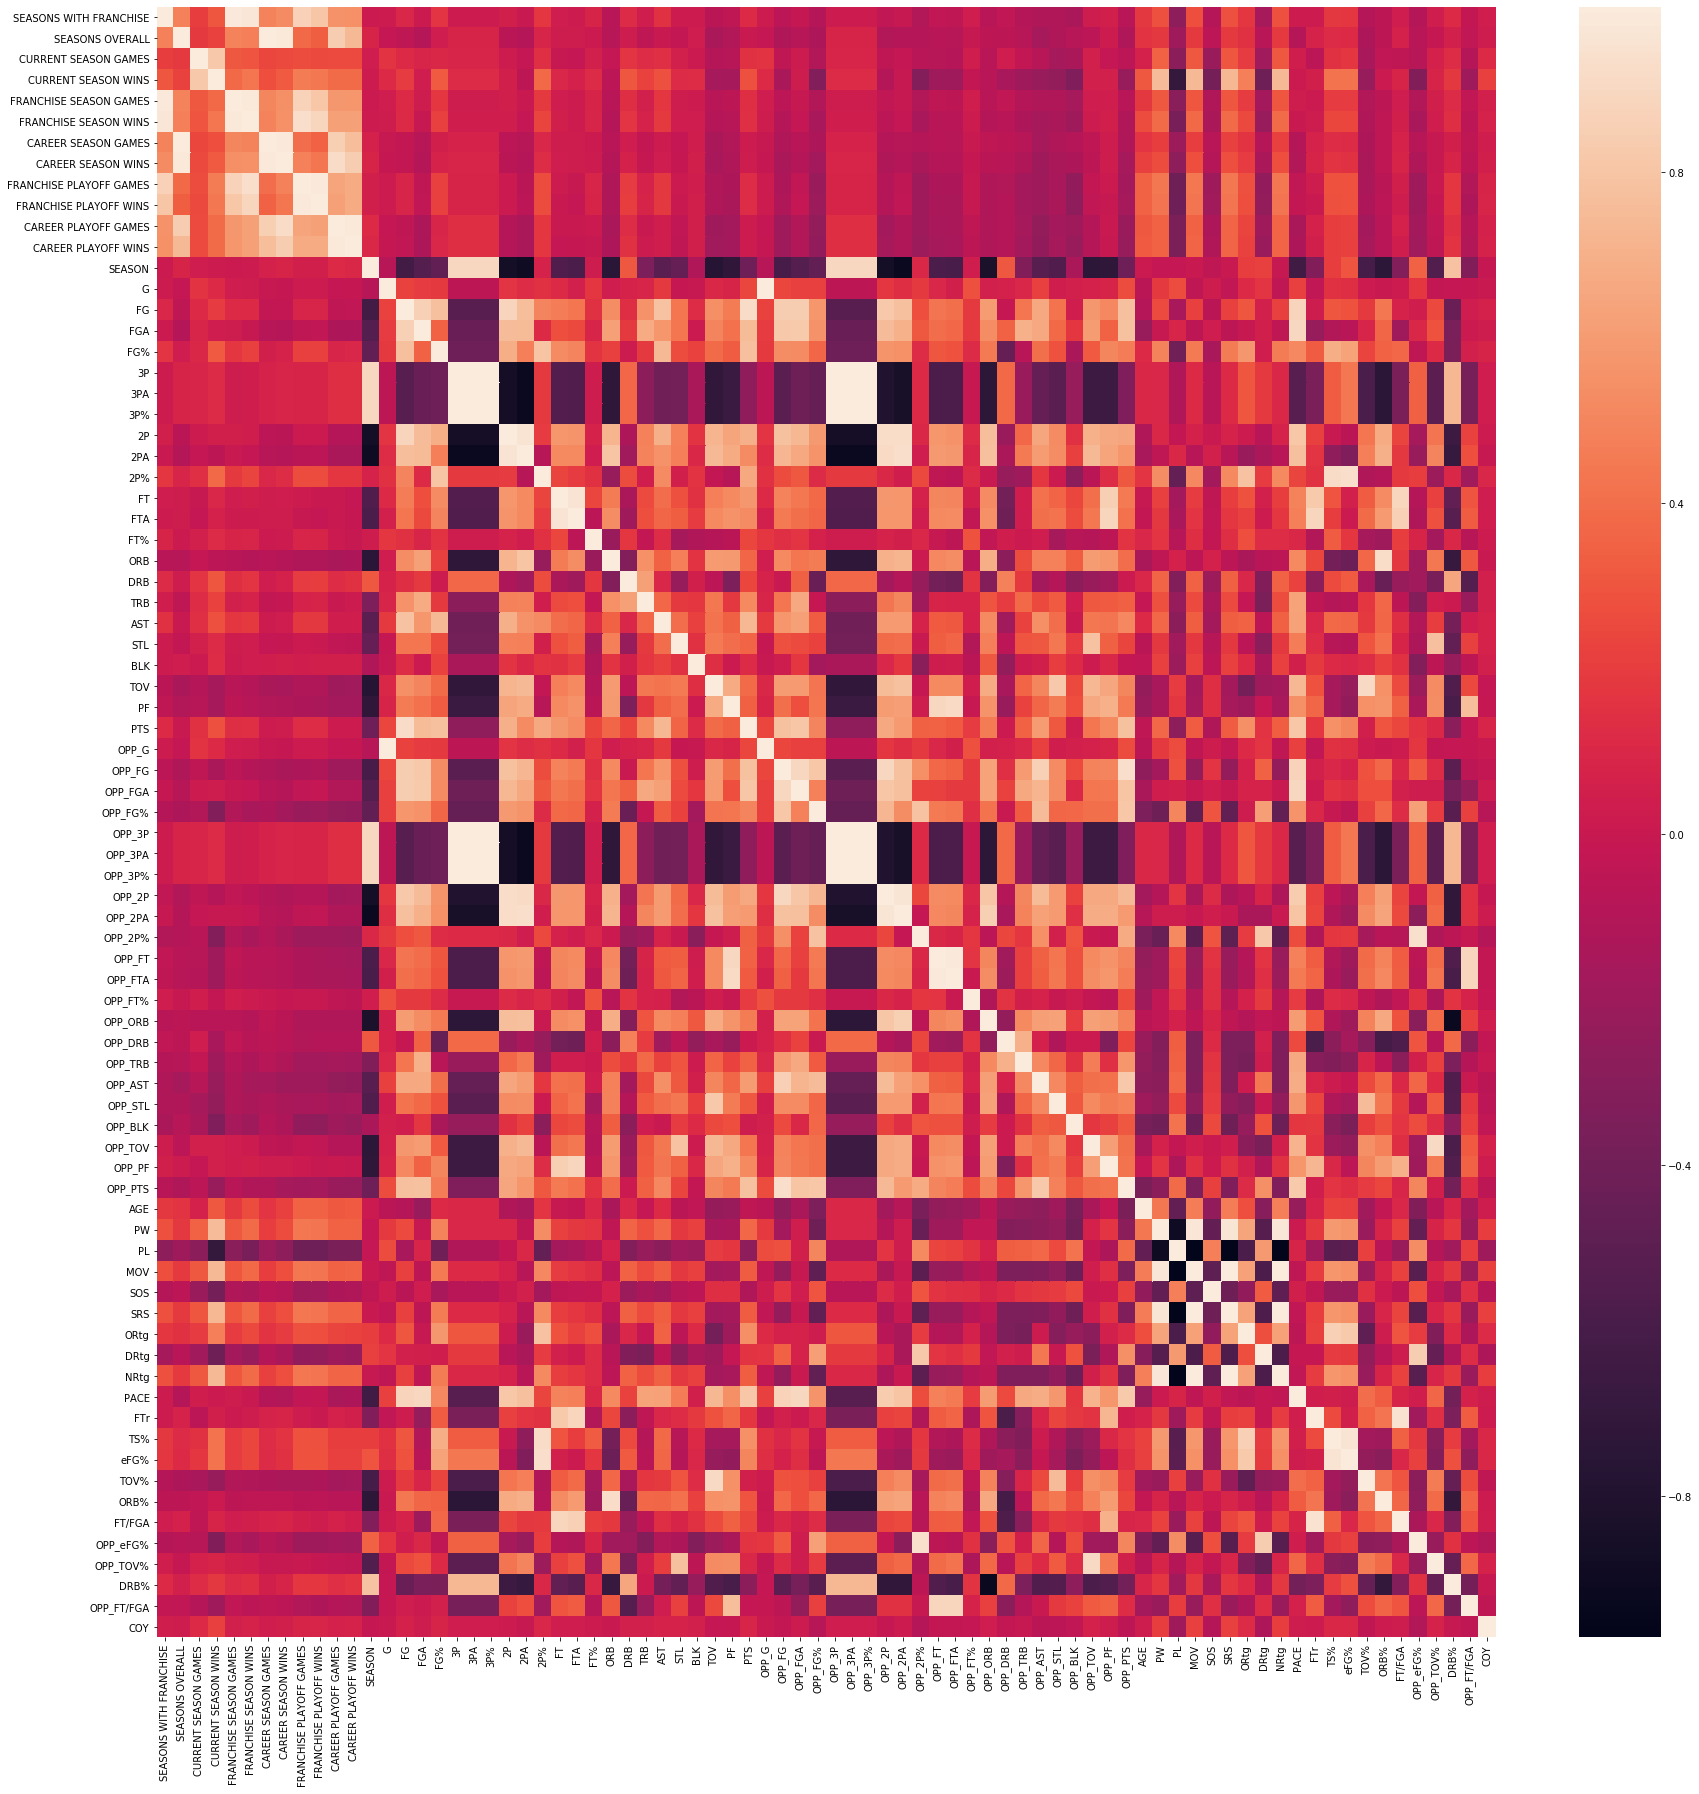

In [246]:
corr = df.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr)

The whitish hue of the top left corner indicates that `WIN` and `GAME` statistics appear to matter **very** much. 

Let's see what has a significant correlation with the COY award.

In [247]:
threshold = 0.05
for index, value in corr['COY'].iteritems():
    if abs(value)>threshold:
        print(index, value)

CURRENT SEASON GAMES 0.11359920794791746
CURRENT SEASON WINS 0.21764609944203592
FRANCHISE SEASON GAMES 0.053151276854888366
FRANCHISE SEASON WINS 0.06982395504285095
FRANCHISE PLAYOFF GAMES 0.0830631553859784
FRANCHISE PLAYOFF WINS 0.0849378537041316
CAREER PLAYOFF GAMES 0.06669003653198749
CAREER PLAYOFF WINS 0.072847920612616
FG 0.06318980870645427
FG% 0.08053534911784703
2P% 0.0965391049261357
DRB 0.0591456219096807
TRB 0.057911447731911495
AST 0.07276389925046507
STL 0.07300952737737737
BLK 0.054022233133902225
PTS 0.08927808312115719
OPP_FG% -0.0852447411069098
OPP_2P% -0.09279412624146349
OPP_AST -0.06465154255173595
OPP_STL -0.05849571822698517
OPP_TOV 0.06674090814663304
PW 0.20282119218684597
PL -0.19850434198291064
MOV 0.20740447792956693
SOS -0.09327389939758682
SRS 0.20748396385759718
ORtg 0.11896730313375109
DRtg -0.12967106743277185
NRtg 0.20613382194841318
TS% 0.10549325983533893
eFG% 0.10585697259681347
OPP_eFG% -0.10623272727084236
OPP_TOV% 0.07378971180352442
COY 1.0

These features correlate the most with the COY award and appear to make sense. Let's dissect them a little.

### `PW`, `PL`, `SRS`, `CAREER SEASON WINS`, `FRANCHISE SEASON WINS`

These are some interesting features that one wouldn't expect to have a direct correlation. They add a human element to the award. If people care about these features, it indicates that expectations **DO MATTER** even though people should be as objective as possible.

For example, a coach with an excellent reputation like Gregg Popovich seems to have more pull than a new coach.

The rest of the features are simply features that explain the team's performance and should signficantly correlate with the award

As expected, the one of the most important features appears to be `CURRENT SEASON WINS`.

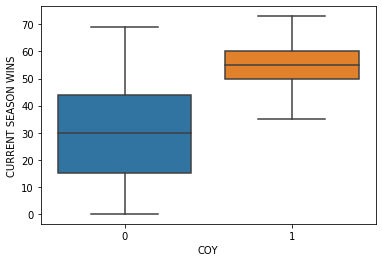

In [248]:
sns.boxplot(x='COY', y='CURRENT SEASON WINS', data=df)

It appears coaches need to win ~50+ games for an 82 game season in order to be eligible.

In [249]:
index = df[df['COY']==1]['CURRENT SEASON WINS'].idxmin()
print(df.iloc[index]['CURRENT SEASON WINS'])
df.iloc[index]

35


COACH                     Mike Dunleavy
TEAM                                POR
SEASONS WITH FRANCHISE                2
SEASONS OVERALL                       8
CURRENT SEASON GAMES                 50
                              ...      
OPP_eFG%                          0.445
OPP_TOV%                           14.9
DRB%                               71.8
OPP_FT/FGA                        0.233
COY                                   1
Name: 901, Length: 80, dtype: object

For Mike Dunleavy's minimum win season, there were only 50 games since it was a lockout season. Hence, that explains the outlier case.

Let's find the unfortunate coach who won the most games, but did not win the award.

In [250]:
most_wins = df.iloc[df[df['COY']==0]['CURRENT SEASON WINS'].idxmax()]
print(most_wins['COACH'], most_wins['SEASON'], most_wins['TEAM'], most_wins['CURRENT SEASON WINS'])

Phil Jackson 1997 CHI 69


Phil Jackson, one year after his 72 win season in 1995-96 appeared to *underperform* by winning only 69 games. This, once again, indicates that the COY award takes into account historical performance. Who won instead?

In [251]:
df[(df['COY']==1) & (df['SEASON']==1997)]

,COACH,TEAM,SEASONS WITH FRANCHISE,SEASONS OVERALL,CURRENT SEASON GAMES,CURRENT SEASON WINS,FRANCHISE SEASON GAMES,FRANCHISE SEASON WINS,CAREER SEASON GAMES,CAREER SEASON WINS,...,TS%,eFG%,TOV%,ORB%,FT/FGA,OPP_eFG%,OPP_TOV%,DRB%,OPP_FT/FGA,COY
964,Pat Riley,MIA,2,15,82,61,164,103,1219,859,...,0.546,0.507,15.5,29.2,0.233,0.465,15.6,70.6,0.248,1


Pat Riley, with 61 wins won instead.

Another interesting statistic is the `MOV`.

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


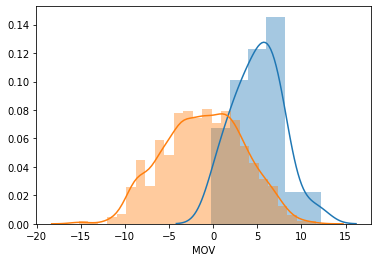

In [252]:
sns.distplot(df[df['COY']==1]['MOV'])
sns.distplot(df[df['COY']==0]['MOV'])

As expected, `COY`'s are expected to *dominate* their teams and not just defeat them. 

One final statistic to look into is `SRS`. According to Basketball Reference `SRS` is:

'Simple Rating System - a rating that takes into account average point differential and strength of schedule. The rating is denominated in points above/below average, where zero is average.'

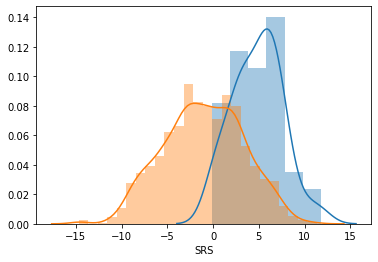

In [253]:
sns.distplot(df[df['COY']==1]['SRS'])
sns.distplot(df[df['COY']==0]['SRS'])

Evidently, teams with a higher `SRS` indicate a greater chance of winning `COY` for their coaches.

## Splitting labels and features

The `COY` feature is our label, so let's separate that from our features.

In [254]:
y = df['COY']
X = df.drop(['COY', 'TEAM', 'COACH'], axis=1)

In [255]:
X

,SEASONS WITH FRANCHISE,SEASONS OVERALL,CURRENT SEASON GAMES,CURRENT SEASON WINS,FRANCHISE SEASON GAMES,FRANCHISE SEASON WINS,CAREER SEASON GAMES,CAREER SEASON WINS,FRANCHISE PLAYOFF GAMES,FRANCHISE PLAYOFF WINS,...,FTr,TS%,eFG%,TOV%,ORB%,FT/FGA,OPP_eFG%,OPP_TOV%,DRB%,OPP_FT/FGA
0,1,1,82,29,82,29,82,29,0.0,0.0,...,0.255,0.555,0.522,14.3,24.7,0.192,0.541,12.8,76.4,0.237
1,6,6,82,49,492,270,492,270,56.0,27.0,...,0.215,0.567,0.534,11.5,21.6,0.173,0.514,13.4,77.0,0.198
2,3,3,82,42,246,90,246,90,5.0,1.0,...,0.284,0.556,0.520,13.0,23.8,0.211,0.512,11.6,76.4,0.190
3,4,4,24,5,270,115,270,115,6.0,2.0,...,0.235,0.541,0.505,12.7,19.4,0.184,0.541,11.9,77.3,0.188
4,4,4,24,5,270,115,270,115,6.0,2.0,...,0.235,0.541,0.505,12.7,19.4,0.184,0.541,11.9,77.3,0.188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724,7,11,82,49,536,348,739,431,92.0,53.0,...,0.232,0.504,0.465,15.1,25.6,0.180,0.446,15.9,72.3,0.203
1725,1,8,82,25,82,25,630,316,0.0,0.0,...,0.275,0.480,0.432,16.2,27.6,0.212,0.468,17.6,66.7,0.210
1726,1,1,82,30,82,30,82,30,0.0,0.0,...,0.289,0.508,0.460,16.1,28.2,0.225,0.467,15.6,69.1,0.236
1727,2,2,82,27,164,48,164,48,0.0,0.0,...,0.275,0.509,0.467,17.5,31.9,0.207,0.484,16.6,68.5,0.241


Before we begin, there is one key flaw in our dataset to look into. Namely, the two classes are not balanced at all.

In [256]:
from collections import Counter
Counter(y)

Counter({0: 1686, 1: 43})

Clearly, there are a **lot** more non-coaches of the year than coaches of the year (as expected). This disparity can lead to a bad model. How can we fix this.

### SMOTE Oversampling

SMOTE (Synthetic Minority Over-sampling Technique) is a method of oversampling to even the distribution of the two classes. SMOTE takes a random sample from the minority class (`COY`=1 in our case) and computes it k-nearest neighbors. It chooses one of the neighbors and computes the vector between the sample and the neighbor. Next, it multiplies this vector by a random number between 0 and 1 and adds the vector to the original random sample to obtain a new data point.

See more details [here](https://www.cs.cmu.edu/afs/cs/project/jair/pub/volume16/chawla02a-html/chawla2002.html).

In [257]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42) # to replicate, let's keep a random state of 42

X_res, y_res = sm.fit_resample(X, y)

In [258]:
Counter(y_res)

Counter({0: 1686, 1: 1686})

Better! Now we have 2 balanced classes.

# Train Test Split

In [259]:
from sklearn.model_selection import train_test_split

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20)

In [261]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [262]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Creation

## Models

For this binary classification problem, we'll use:
* Decision Tree Classifier
* Random Forest Classifier
* Logistic Classifier
* Support Vector Machine
* Neural Network

## Metrics

Binary classification problems have multiple metrics. For this project, we'll use:

### Accuracy
% of correctly categorized instances

Accuracy = (TP+TN)/(TP+TN+FP+FN)   

### Recall
Ability to categorize (+) class

Recall = TP/(TP+FN)

### Precision
How many of TP were correct

Precision = TP/(TP+FP)

There is a trade-off between recall and precision. Recall provides the ability to predict TP while precision provides the ability to limit FP. Hence, we have one final metric combining the two:

### F1

F1 = 2(Precision * Recall) / (Precision + Recall)


In [263]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

### Decision Tree Classifier

For our Decision Tree Classifier, we'll use the standard Shannon's Entropy as the criterion.

Entropy, breifly, measures the amount of disorder in a given system. The Decision Tree will aim to minimize entropy.
The key parameter in a decision tree is the depth. Increasing the depth of the tree can lead to overfitting, but too a depth can lead to underfitting. We'll use `GridSearchCV` to fine tune this hyperparameter.

In [264]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [265]:
tree = DecisionTreeClassifier(max_depth=40, random_state=17) #try with 40 max_depth
tree.fit(X=X_train, y = y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=40, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=17, splitter='best')

In [266]:
predictions = tree.predict(X_test)
print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=predictions)}')
print(f'Recall: {recall_score(y_true=y_test, y_pred=predictions)}')
print(f'Precision: {precision_score(y_true=y_test, y_pred=predictions)}')
print(f'F1: {f1_score(y_true=y_test, y_pred=predictions)}')

Accuracy: 0.965925925925926
Recall: 0.9766763848396501
Precision: 0.9571428571428572
F1: 0.9668109668109668


Pretty good metrics so far. Let's see if we can improve the `max_depth` hyperparameter using `GridSearchCV`.

In [267]:
tree_params = {'max_depth': range(10,100)}
locally_best_tree = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), 
                                 param_grid=tree_params,
                                cv=5)
locally_best_tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(10, 100)}, pre_dispatch='2*n_jobs',


In [268]:
locally_best_tree.best_params_

{'max_depth': 37}

So the best `max_depth` was 37. Let's compute the metrics for this.

In [269]:
predictions = locally_best_tree.predict(X_test)
print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=predictions)}')
print(f'Recall: {recall_score(y_true=y_test, y_pred=predictions)}')
print(f'Precision: {precision_score(y_true=y_test, y_pred=predictions)}')
print(f'F1: {f1_score(y_true=y_test, y_pred=predictions)}')

Accuracy: 0.9629629629629629
Recall: 0.9766763848396501
Precision: 0.9517045454545454
F1: 0.9640287769784172


Not too much of a difference.

### Random Forest Classifier

The Random Forest Classifier is an ensemble method. Random Forests perform a similar analysis to Decision Trees, except rather than use a single tree, it creates multiple trees by taking a random subset of the data. The final prediction is an *average* of the decisions of the set of trees or the forest.

The goal of a Random Forest is to avoid overfitting the data and reduce the variance.

The hyperparameters to tune here is the number of trees, the max depth, and the maximum number of features to train on.

In [270]:
from sklearn.ensemble import RandomForestClassifier

forest_params = {'max_depth': range(35,45), 
               'max_features': range(5, len(X_res.columns), 20)}
locally_best_forest = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1),
                                  param_grid=forest_params, cv=3, verbose=1)
locally_best_forest.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  5.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=42,
                                    

In [271]:
locally_best_forest.best_params_

{'max_depth': 35, 'max_features': 5}

In [272]:
predictions = locally_best_forest.predict(X_test)
print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=predictions)}')
print(f'Recall: {recall_score(y_true=y_test, y_pred=predictions)}')
print(f'Precision: {precision_score(y_true=y_test, y_pred=predictions)}')
print(f'F1: {f1_score(y_true=y_test, y_pred=predictions)}')

Accuracy: 0.9851851851851852
Recall: 0.9970845481049563
Precision: 0.9743589743589743
F1: 0.9855907780979827


It seems our Random Forest Classifier has the best results thus far! It boasts a ~99% F1 score with an extremely high recall and precision.

### Logistic Classifier

The Logistic Classifier attempts to fit a hyperplane to the training data to separate the two classes. It performs this fit using the Ordinary Least Squares method or by minimizing the sum of the squares of the residuals (i.e. the distance between the data point and the hyperplane).

The Logistic Classifier, then, fits the output into the sigmoid curve to compute a probability between 0 and 1.
The Logistic Classifier has no significant hyperparameters to fine tune, so we'll fit as is.

In [273]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(max_iter=1000)
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [274]:
predictions = logit.predict(X_test)
print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=predictions)}')
print(f'Recall: {recall_score(y_true=y_test, y_pred=predictions)}')
print(f'Precision: {precision_score(y_true=y_test, y_pred=predictions)}')
print(f'F1: {f1_score(y_true=y_test, y_pred=predictions)}')

Accuracy: 0.9155555555555556
Recall: 0.9795918367346939
Precision: 0.8704663212435233
F1: 0.9218106995884774


For such a simple model, the logistic classifier had a fairly impressive recall. Let's see how it compares to its cousin the SVM classifier.

### Support Vector Machine (SVM)

The SVM Classifier is quite similar to the Logistic Classifier in that it attempts to create a decision boundary. The key difference is that the SVM can create a non-linear decision boundary whereas the Logistic Classifier always uses a hyperplane (linear).

Additionally, the SVM can use the [kernel trick](https://medium.com/@zxr.nju/what-is-the-kernel-trick-why-is-it-important-98a98db0961d), which helps us if the number of features is extremely large.

In [275]:
from sklearn.svm import SVC

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

locally_best_SVC = GridSearchCV(SVC(random_state=42),
                                  param_grid=tuned_parameters, cv=3, verbose=1)
locally_best_SVC.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   17.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [276]:
locally_best_SVC.best_params_

{'C': 1000, 'kernel': 'linear'}

In [277]:
predictions = locally_best_SVC.predict(X_test)
print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=predictions)}')
print(f'Recall: {recall_score(y_true=y_test, y_pred=predictions)}')
print(f'Precision: {precision_score(y_true=y_test, y_pred=predictions)}')
print(f'F1: {f1_score(y_true=y_test, y_pred=predictions)}')

Accuracy: 0.9585185185185185
Recall: 0.9912536443148688
Precision: 0.9315068493150684
F1: 0.96045197740113


The SVM appears to improve on all metrics from the logistic classifier. But, the Random Forest still appears to perform the best.

### Neural Network

The neural network is meant to model the human brain. 

The network consists of multiple layers, taking in inputs and feeding them between each layers.
Typically, we start off with a high number of nodes on the input layer and gradually drop the number of layers over time.

For this model, we'll keep it simple. We'll have 6 layers, starting off with 80 nodes (corresponding to our number of features) and drop it down to 40, 20, 10, 5, and 1 in our final output layer.

Finally, we'll use the [tensorflow](https://www.tensorflow.org/) library to create the model.

In [278]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

We'll also implement early stopping to prevent overfitting. Early stopping stops training when validation loss starts to increase.

Another method of preventing overfitting is adding dropouts, which 'shuts off' x% of the nodes at any given layer when training. This, once again, helps prevent overfitting by adding some complexity.

In [279]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [280]:
model = Sequential()

In [281]:
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(25, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [282]:
model.fit(X_train, y_train.to_numpy(), epochs=50, validation_data=(X_test, y_test.to_numpy()), callbacks=[early_stop])

Train on 2697 samples, validate on 675 samples
Epoch 1/50
2697/2697 [==============================] - 2s 716us/sample - loss: 0.6539 - accuracy: 0.5877 - val_loss: 0.5169 - val_accuracy: 0.7867
Epoch 2/50
2697/2697 [==============================] - 0s 100us/sample - loss: 0.4829 - accuracy: 0.7861 - val_loss: 0.3123 - val_accuracy: 0.8874
Epoch 3/50
2697/2697 [==============================] - 0s 179us/sample - loss: 0.3674 - accuracy: 0.8550 - val_loss: 0.2848 - val_accuracy: 0.8859
Epoch 4/50
2697/2697 [==============================] - 0s 98us/sample - loss: 0.3148 - accuracy: 0.8799 - val_loss: 0.2256 - val_accuracy: 0.9274
Epoch 5/50
2697/2697 [==============================] - 0s 102us/sample - loss: 0.2764 - accuracy: 0.8984 - val_loss: 0.2617 - val_accuracy: 0.8978


We'll look into the accuracy a little bit more carefully by plotting the loss and validation loss curves.

In [283]:
losses = pd.DataFrame(model.history.history)
losses.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

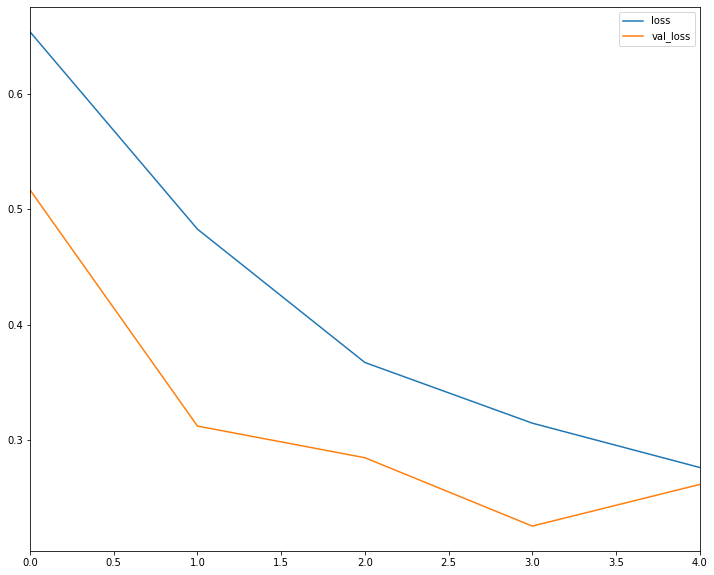

In [284]:
losses[['loss', 'val_loss']].plot(figsize=(12, 10))

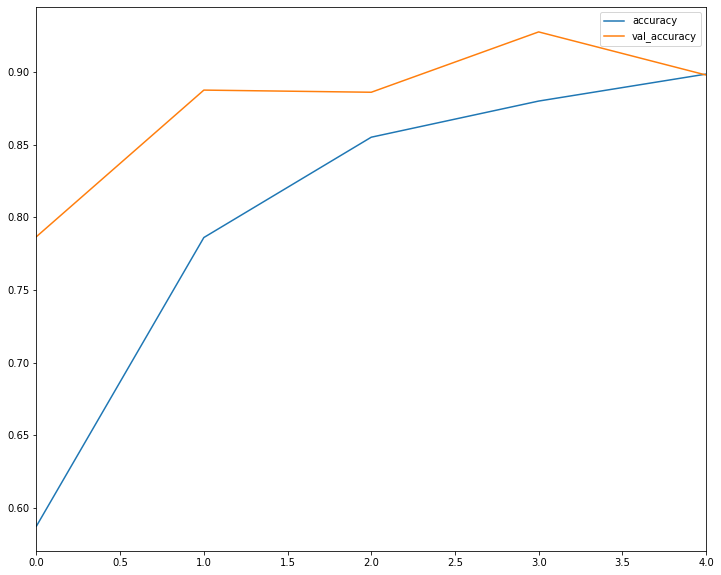

In [285]:
losses[['accuracy', 'val_accuracy']].plot(figsize=(12, 10))

In [286]:
predictions = model.predict_classes(X_test)
print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=predictions)}')
print(f'Recall: {recall_score(y_true=y_test, y_pred=predictions)}')
print(f'Precision: {precision_score(y_true=y_test, y_pred=predictions)}')
print(f'F1: {f1_score(y_true=y_test, y_pred=predictions)}')

Accuracy: 0.8977777777777778
Recall: 1.0
Precision: 0.8325242718446602
F1: 0.9086092715231788


The neural network had incredible recall, but low precision. I would categorize this as our second best model since recall is probably the most important metric.

### Model Persistence

Before we proceed, let's make sure we save our models so we don't have to retrain everything.

In [305]:
from joblib import dump, load
from tensorflow.keras.models import load_model

In [306]:
dump(locally_best_tree, 'decision_tree.joblib') 
dump(locally_best_forest, 'random_forest.joblib') 
dump(logit, 'logit.joblib') 
dump(locally_best_SVC, 'SVC.joblib') 
model.save('neural_network.h5') 

In [307]:
locally_best_tree = load('decision_tree.joblib')
locally_best_forest = load('random_forest.joblib')
logit = load('logit.joblib')
locally_best_SVC = load('SVC.joblib')
model = load_model('neural_network.h5')

# Model Evaluation

First let's create a table of our scores

| Model | Accuracy | Recall | Precision | F1|
|-|-|-|-|-|
|Decision Tree|0.963|0.977|0.952|0.964|
|Random Forest|0.985|0.997|0.974|0.986|
|Logistic|0.920|0.980|0.870|0.922|
|SVC|0.959|0.991|0.932|0.960|
|Neural Network|0.898|1.0|0.833|0.909|

In terms of all metrics the Random Forest outperforms all. Moreover, the Random Forest boasts an **extremely** high recall which is our most important metric. Once again, when predicting the Coach of the Year, we want to be able to predict the positive class best, which is indicated by a high recall.

### Confusion Matrices

Confusion Matrices are another way of visualization our models' performances.
Confusion Matrices are nxn matrices where the columns represent the actual class and the rows represent the class predicted by the model.

In the case of a binary classification problem, we obtain a 2x2 matrix with the true positives (bottom right), true negatives (top left), false positive (top right), and false negatives (bottom left).

In [308]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model_name, X_test, y_test, predictions):
    fig, ax = plt.subplots(figsize=(15, 15))
    labels = ['NOT COY', 'COY']
    cm = confusion_matrix(predictions, y_test)
    cax = ax.matshow(cm, cmap='magma')
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    ax.xaxis.set_ticks_position('bottom')
    ax.set_title(f'{model_name} Confusion Matrix')
    for (i, j), z in np.ndenumerate(cm):
        ax.text(j, i, z, ha='center', va='center', color='white', size=75)
    fig.colorbar(cax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

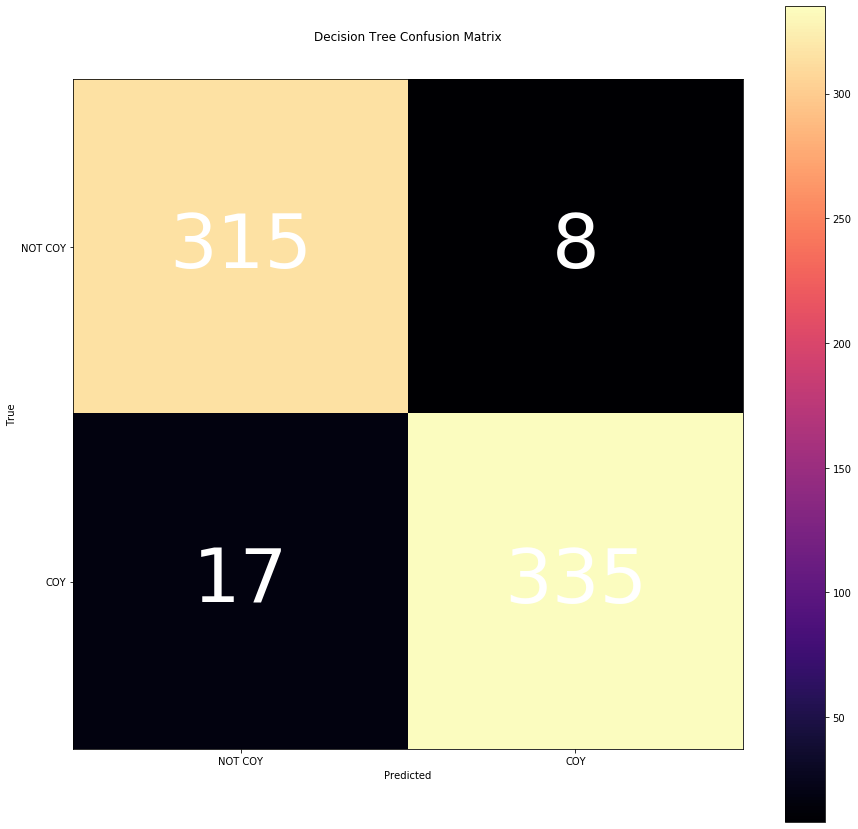

In [309]:
plot_confusion_matrix('Decision Tree', X_test, y_test, locally_best_tree.predict(X_test))

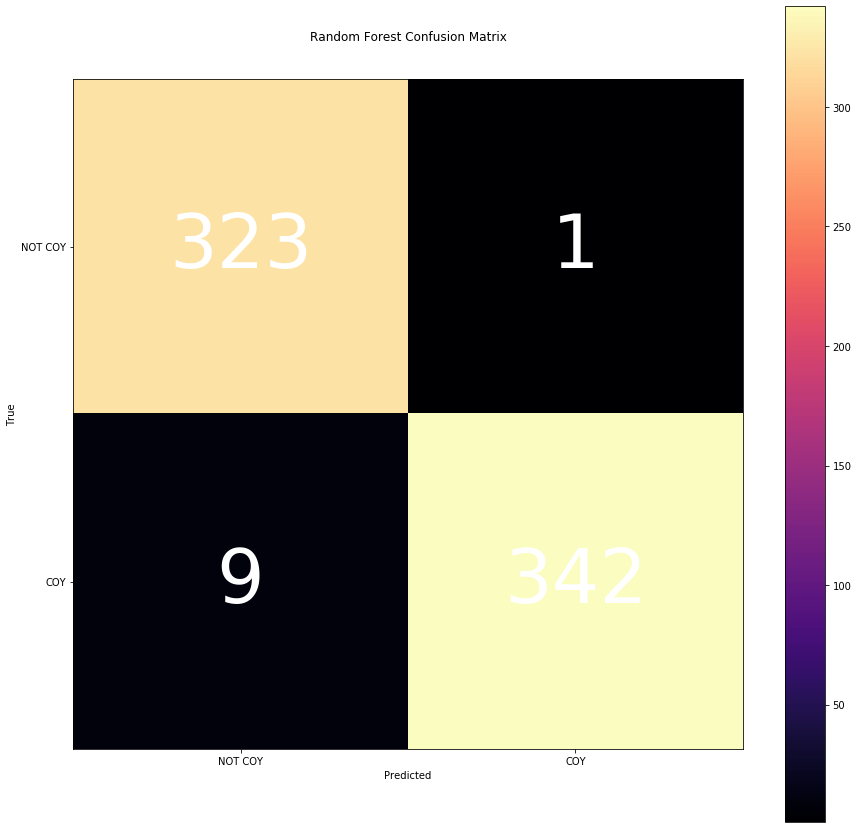

In [310]:
plot_confusion_matrix('Random Forest', X_test, y_test, locally_best_forest.predict(X_test))

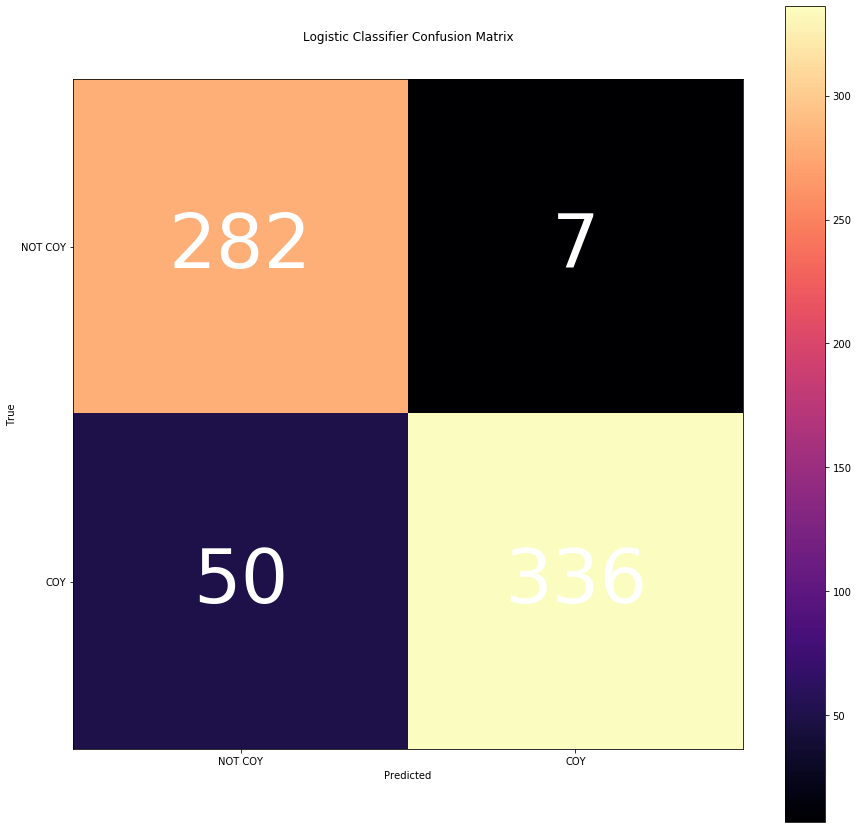

In [311]:
plot_confusion_matrix('Logistic Classifier', X_test, y_test, logit.predict(X_test))

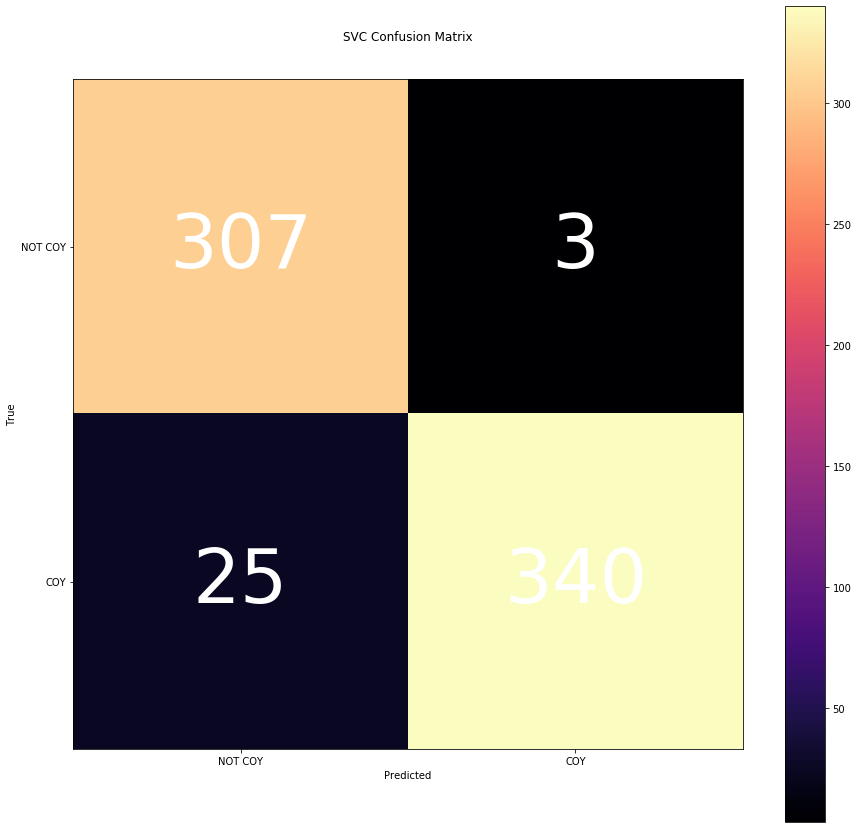

In [312]:
plot_confusion_matrix('SVC', X_test, y_test, locally_best_SVC.predict(X_test))

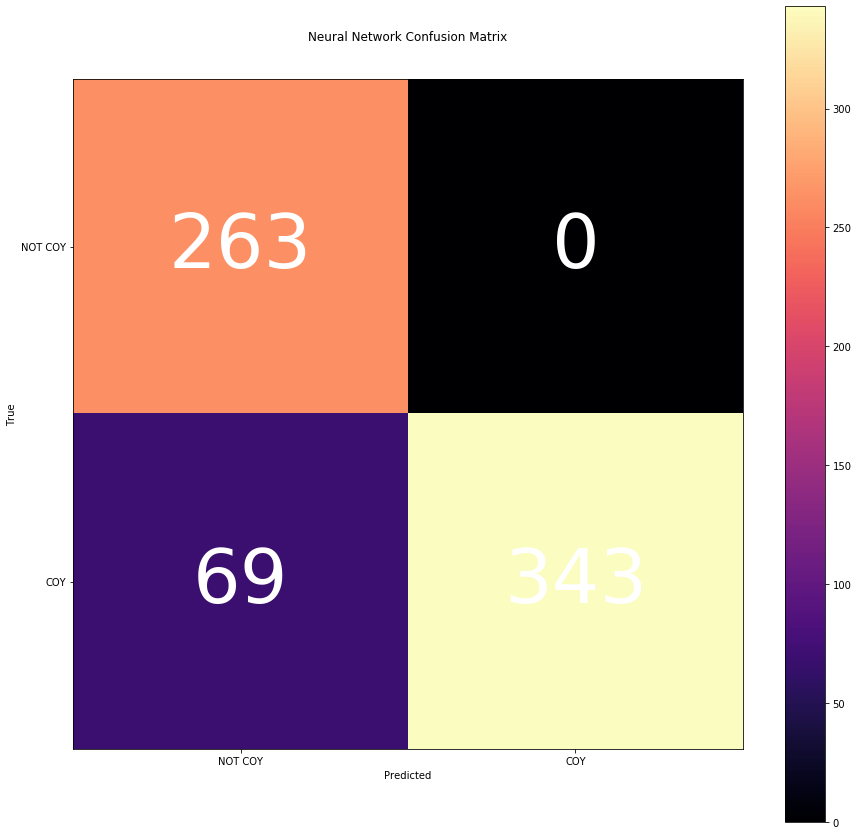

In [313]:
plot_confusion_matrix('Neural Network', X_test, y_test, model.predict_classes(X_test))

Looking at the confusion matrices we can clearly see the disparity between the Random Forest Classifier and other classifiers. Evidently, the Random Forest Classifier is the best option.

## Random Forest Evaluation

So what made the Random Forest so good? What features did it use that enabled it to make such accurate predictions?

In [314]:
d = dict(zip(list(X_res.columns), list(locally_best_forest.best_estimator_.feature_importances_)))
for k in d:
    d[k]=d[k]*100
d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1])[::-1]}
d

{'CURRENT SEASON WINS': 6.569329857214043,
 'SRS': 6.368785568654217,
 'PW': 6.059094690243399,
 'NRtg': 5.5519116066060175,
 'MOV': 4.473122672559081,
 'PL': 3.643349558354282,
 'FRANCHISE PLAYOFF WINS': 3.5359935472024073,
 'CURRENT SEASON GAMES': 2.7176381795953812,
 'FRANCHISE PLAYOFF GAMES': 2.561381844631836,
 'DRtg': 2.313753749962562,
 'FRANCHISE SEASON WINS': 2.249141887210766,
 'OPP_TOV': 2.188633272335423,
 'FG%': 2.159413580606702,
 'SOS': 2.0625836055906586,
 'STL': 1.887112980779721,
 'FRANCHISE SEASON GAMES': 1.716664866801524,
 'OPP_eFG%': 1.5837218802561868,
 'CAREER PLAYOFF GAMES': 1.4638480409000059,
 'CAREER PLAYOFF WINS': 1.4255142515300019,
 'PTS': 1.240490644744307,
 'OPP_STL': 1.2099332415342863,
 'AGE': 1.1578008913160593,
 'FT%': 1.14927915841129,
 'CAREER SEASON WINS': 1.120470639430678,
 'OPP_TRB': 1.083895183135873,
 'OPP_DRB': 1.078131613795283,
 'TRB': 1.0519931242314504,
 'OPP_TOV%': 1.0040552486191212,
 '2P%': 0.9863344751296688,
 'OPP_2P': 0.9763635728

So that's the contribution of **ALL** the features. Let's plot this with a filter ensuring the % contribution is greater than 1%.

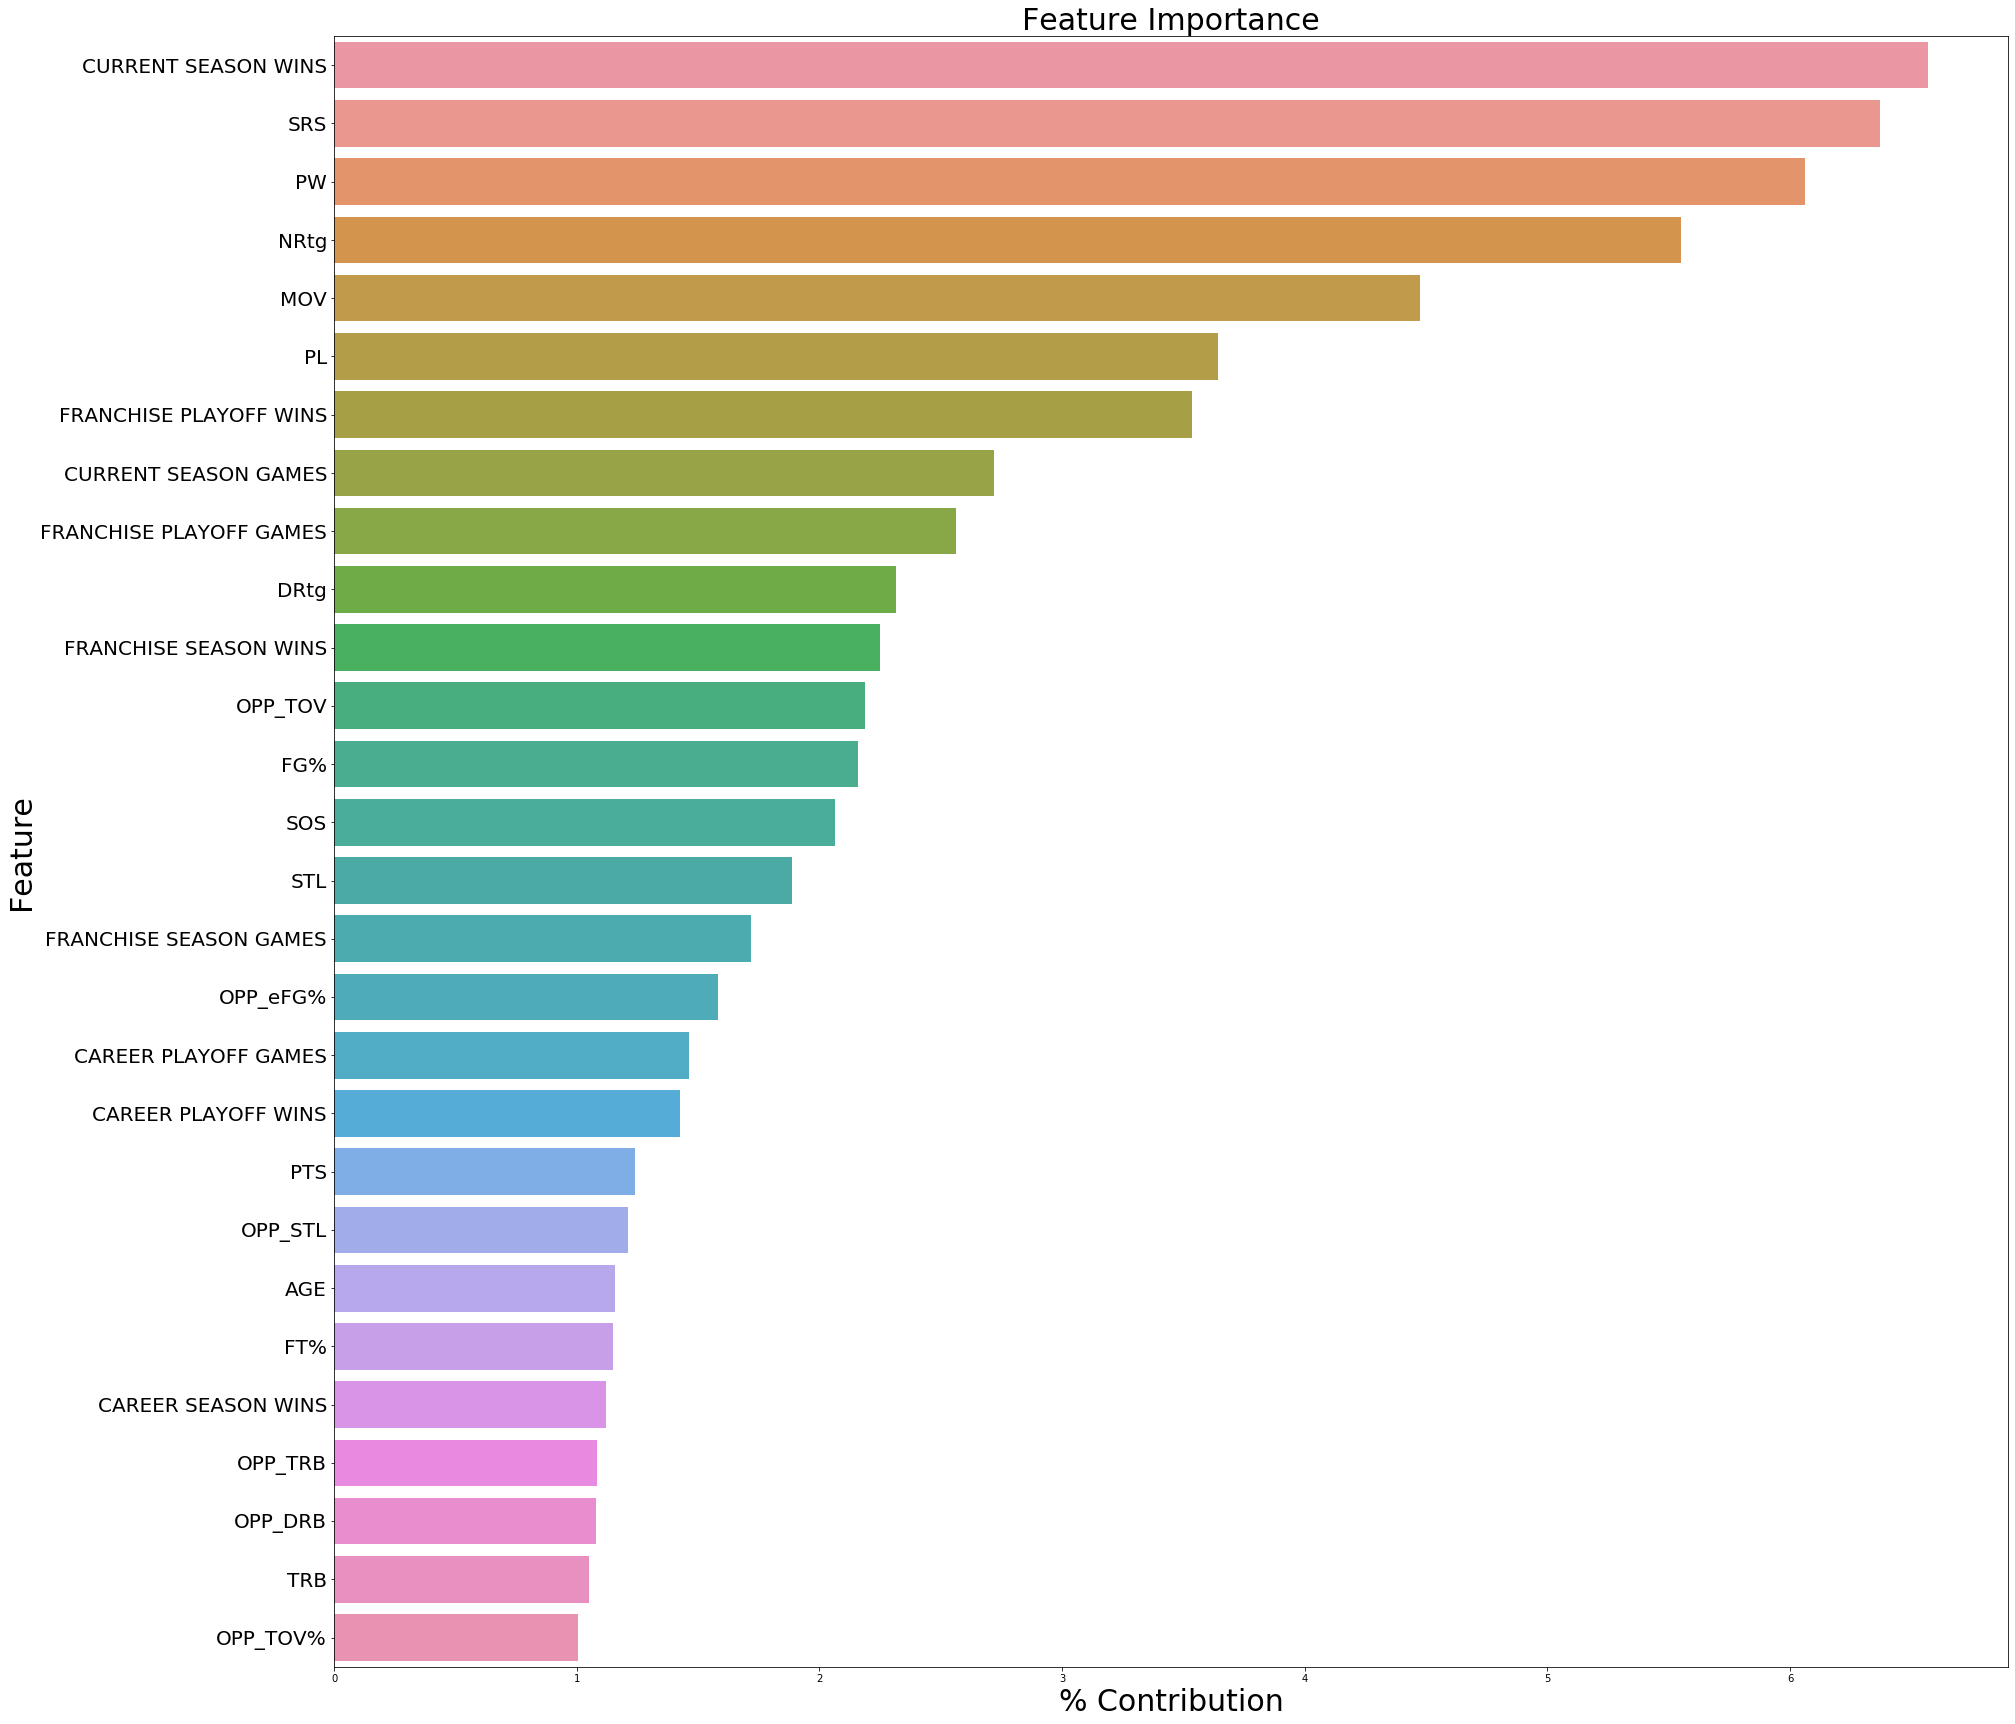

In [315]:
feature_df = pd.DataFrame(columns=['FEATURE', '% CONTRIBUTION'])
for k in d:
    if d[k]>1:
        d2 = {'FEATURE': k, '% CONTRIBUTION': d[k]}
        feature_df = feature_df.append(d2, ignore_index=True)
plt.figure(figsize=(30, 30))
ax = sns.barplot(y='FEATURE', x='% CONTRIBUTION', data=feature_df)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)
ax.set_xlabel('% Contribution', fontsize=30)
ax.set_ylabel('Feature', fontsize=30)
ax.set_title('Feature Importance', fontsize=30)
plt.show()

Interesting that SRS such an important feature. For reference, here is the definition of the SRS:

**SRS** - Simple Rating System; a rating that takes into account average point differential and strength of schedule. The rating is denominated in points above/below average, where zero is average.

This weight towards the SRS indicate that point differential against competitive teams matters a lot. For example, if the Bucks crush the Warriors this year, people don't really care. However, point differential in **key** matchups like the Lakers vs. Clippers or Bucks vs. Celtics matters much much more. 

However, we see that other statistics matter significantly too, like CURRENT SEASON WINS, NRtg, and MOV as we predicted.

Something one wouldn't anticipate is the contribution of factors outside of this season like FRANCHISE and CAREER features. Along these lines, one wouldn't expect PW or PL to matter too much, but this model indicates that it is one of the most important features.

### Shapley Values

Another way of measuring a feature's contribution is the **Shapley Value**.

Shapley Values are a method from coalition game theory that evaluates the model by considering all possible scenarios with and without the individual feature. For more information on the Shapley Value, see [here](https://en.wikipedia.org/wiki/Shapley_value).

In [316]:
import shap

explainer = shap.TreeExplainer(locally_best_forest.best_estimator_)
shap_values = explainer.shap_values(X_res)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


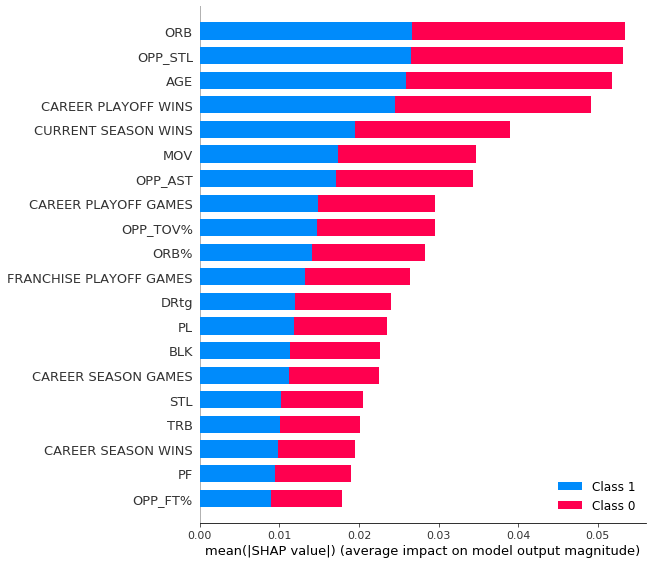

In [317]:
shap.initjs()
shap.summary_plot(shap_values, X_res, plot_type='bar')

This produces a stacked bar chart with some rather interesting results. The bar chart indicates that ORB and OPP_STL should be an excellent indicator of the COY. I would contend, as an individual with a solid amount of basketball knowledge that features like ORB, OPP_STL, AGE, etc. are **NOT** significant indicators of the next COY. I believe this is a case of classic correlation does not equal causation.

Other features, such as CURRENT SEASON WINS, PW, NRtg, etc. should and do have a more significant impact. It appears that the Shapley Value computation was not as successful as anticipated. I would opt for looking at the `feature_importances_` chart above to understand the contribution of individual features on the model.

Let's also take a look at where the random forest failed. If you recall from the confusion matrix, there was one instance where a COY was classified as NOT COY

In [320]:
predictions = locally_best_forest.predict(X_test)
wrong_indices = []
for i in range(0, len(predictions)):
    if predictions[i]!=y_test.to_numpy()[i]:
        wrong_indices.append(i)
inverted_X_test = scaler.inverse_transform(X_test)
for w in wrong_indices:
    if predictions[w]==0:
        print('Classified as NOT COY when candidate was COY')
        for i in range(0, len(list(X.columns))):
            print(list(X.columns)[i], inverted_X_test[w][i])

Classified as NOT COY when candidate was COY
SEASONS WITH FRANCHISE 5.999999999999999
SEASONS OVERALL 6.0
CURRENT SEASON GAMES 82.00000000000001
CURRENT SEASON WINS 49.00000000000001
FRANCHISE SEASON GAMES 491.99999999999994
FRANCHISE SEASON WINS 188.0
CAREER SEASON GAMES 491.99999999999994
CAREER SEASON WINS 188.00000000000003
FRANCHISE PLAYOFF GAMES 13.0
FRANCHISE PLAYOFF WINS 6.0
CAREER PLAYOFF GAMES 13.0
CAREER PLAYOFF WINS 6.0
SEASON 1976.0
G 82.0
FG 42.6
FGA 94.00000000000001
FG% 0.45399999999999996
3P 0.0
3PA 0.0
3P% 0.0
2P 42.6
2PA 94.0
2P% 0.45399999999999996
FT 16.4
FTA 22.3
FT% 0.737
ORB 14.5
DRB 31.6
TRB 46.1
AST 22.5
STL 7.799999999999999
BLK 4.8
TOV 16.2
PF 22.8
PTS 101.7
OPP_G 82.0
OPP_FG 39.79999999999999
OPP_FGA 87.70000000000002
OPP_FG% 0.45399999999999996
OPP_3P 0.0
OPP_3PA 0.0
OPP_3P% 0.0
OPP_2P 39.8
OPP_2PA 87.7
OPP_2P% 0.4539999999999999
OPP_FT 19.6
OPP_FTA 26.2
OPP_FT% 0.748
OPP_ORB 13.8
OPP_DRB 34.0
OPP_TRB 47.9
OPP_AST 21.1
OPP_STL 7.4
OPP_BLK 4.0
OPP_TOV 19.3


The first point is the 1976 COY who was categorized as not COY. This individual was coach [Bill Fitch of the 1975-76 Cleveland Cavaliers](https://www.basketball-reference.com/teams/CLE/1976.html). He had a modest win record of 49-33 during an overall down year where the top record was the 54-28 Lakers. Looking at the modern era where 60 win records and obscene statistics are put up on a regular basis, I would say that this is not a terrible error on our model's part.

The reason the model may have classified this as a NOT COY instance is due to the fact that the team's statistics aren't all that impressive, but impressive with respect to **THAT** year. This lack of incorporating other team performances during the year may be the biggest flaw in our model.

# Predicting the next Coach of the Year

Unfortunately, we do not have all the statistics for the current year, but we will obtain what we can and modify the data as we did earlier.

Note that all our data is PER GAME, so for all of these statistics, we will just use the PER GAME statistics up to this point (1/21/20)

The only unrealistic statistic is, then, CURRENT SEASON statistics. We will assume CURRENT SEASON GAMES will be 82 for all coaches and obtain CURRENT SEASON WINS from [538's ELO projections](https://projects.fivethirtyeight.com/2020-nba-predictions/) on 1/21/20.

Once again, all other stats were acquired via the [`basketball_reference_scraper` Python package](https://github.com/vishaalagartha/basketball_reference_scraper).

In [321]:
df_2020 = pd.read_csv('2020_data.csv')

In [322]:
needed_columns = ['COACH', 'TEAM', 'SEASONS WITH FRANCHISE', 'SEASONS OVERALL',
       'CURRENT SEASON GAMES', 'CURRENT SEASON WINS', 'FRANCHISE SEASON GAMES',
       'FRANCHISE SEASON WINS', 'CAREER SEASON GAMES', 'CAREER SEASON WINS',
       'FRANCHISE PLAYOFF GAMES', 'FRANCHISE PLAYOFF WINS',
       'CAREER PLAYOFF GAMES', 'CAREER PLAYOFF WINS', 'SEASON', 'G', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'OPP_G', 'OPP_FG', 'OPP_FGA', 'OPP_FG%', 'OPP_3P', 'OPP_3PA', 'OPP_3P%',
       'OPP_2P', 'OPP_2PA', 'OPP_2P%', 'OPP_FT', 'OPP_FTA', 'OPP_FT%',
       'OPP_ORB', 'OPP_DRB', 'OPP_TRB', 'OPP_AST', 'OPP_STL', 'OPP_BLK',
       'OPP_TOV', 'OPP_PF', 'OPP_PTS', 'AGE', 'PW', 'PL', 'MOV', 'SOS', 'SRS',
       'ORtg', 'DRtg', 'NRtg', 'PACE', 'FTr', 'TS%', 'eFG%', 'TOV%', 'ORB%',
       'FT/FGA', 'OPP_eFG%', 'OPP_TOV%', 'DRB%', 'OPP_FT/FGA', 'COY']
drop_list = list(list(set(df_2020.columns) - set(needed_columns)))
missing_stats = ['CURRENT PLAYOFF GAMES',
 'CURRENT PLAYOFF WINS',
 'CURRENT PLAYOFF LOSSES',
 'FRANCHISE PLAYOFF GAMES',
 'FRANCHISE PLAYOFF WINS',
 'FRANCHISE PLAYOFF LOSSES',
 'CAREER PLAYOFF GAMES',
 'CAREER PLAYOFF WINS',
 'CAREER PLAYOFF LOSSES']
for m in missing_stats:
    df_2020[m] = df_2020[m].apply(lambda x: 0 if pd.isna(x) else x)
df_2020.drop(drop_list, axis=1,inplace=True)
set(list(df.columns))-set(list(df_2020.columns))

{'COY'}

In [328]:
X_2020 = df_2020.drop(['TEAM', 'COACH'], axis=1)
X_2020 = scaler.transform(X_2020)
y_2020 = locally_best_forest.predict_proba(X_2020)

In [327]:
for i in range(0, len(y_2020)):
    print(df_2020.iloc[i]['TEAM'], y_2020[i][1])

ATL 0.01
BOS 0.31
BRK 0.04
CHI 0.04
CHO 0.03
CLE 0.0
DAL 0.22
DEN 0.16
DET 0.09
GSW 0.01
HOU 0.23
IND 0.13
LAC 0.36
LAL 0.22
MEM 0.0
MIA 0.17
MIL 0.49
MIN 0.01
NOP 0.07
NYK 0.01
NYK 0.01
NYK 0.02
NYK 0.02
OKC 0.03
ORL 0.04
PHI 0.12
PHO 0.03
POR 0.03
SAC 0.01
SAS 0.04
TOR 0.46
UTA 0.12
WAS 0.05


This shows the probability of each coach to win COY in the current season. Let's take a look at each of the candidates in order:

**1) Milwaukee Bucks & Mike Budenholzer (49%)**

Mike Budenholzer was the COY in the 2018-19 season and, objectively, the top candidate for COY this year as well. The Bucks are on a nearly 70-win pace which would automatically elevate him to the top spot.

However, the model is purely objective and fails to incorporate human elements such as the fact that individuals look at the Bucks skeptically as a 'regular season team'. Voters will likely avoid Budenholzer until there is more playoff success.

Moreover, Budenholzer won last year and voters almost never vote for the same candidate twice in a row. In fact, a repeat performance has never occurred in the COY award.

We see here the flaw in the model to not weight the human elements of recency bias against previous COY's and playoff success sufficiently.

**2) Toronto Raptors & Nick Nurse (46%)**

The Raptors are truly an incredible story this year. No one expected them to be this good. Even the ELO ratings put them at an expected 56 wins this season and be tied for the 3rd best record in the league behind the Lakers and Bucks. 

The disparity between what people expected of the Raptors and what has actually transpired (despite injuries to significant players such as Lowry and Siakam) indicates that Nurse would be a viable candidate for COY.

**3) Los Angeles Clippers & Doc Rivers (36%)**

Despite the model favoring Doc Rivers, I believe it is unlikely that he wins COY due to the current stories circulating around the Clippers. 

Everyone came into the season expecting the Clippers to blow everyone out of the water in the *playoffs*. No one expects the Clippers to exceed expectations during the regular season, especially with their superstars Kawhi Leonard and Paul George being the role models of load management.

**4) Boston Celtics & Brad Stevens (31%)**

Brad Stevens is another likely candidate for the COY. Not ony are the Celtics objectively impressive, but they also have the narrative on their side. After last year's disappointing performance, people questioned Stevens, but their newfound success without Kyrie Irving has pushed the blame onto Irving over Stevens. Moreover, significant strides have been made by their young players Jaylen Brown and Jayson Tatum vaulting them into Eastern Conference champion contention.

**5) Los Angeles Lakers & Frank Vogel (22%)**

Being in tune with the current basketball landscape through podcasts and articles, I can tell that Frank Vogel's campaign for the COY is quite strong. Over and over again we hear praises from players like [Anthony Davis](https://heavy.com/sports/2020/01/lakers-anthony-davis-frank-vogel-comments/) and [Danny Green on the recent Lowe Post](http://www.espn.com/espnradio/podcast/archive/_/id/10528553) on how happy the Lakers are.

With the gaudy record, spotlight and percolating positive energy around the Lakers, Vogel is a very viable pick for the COY.

**6) Dallas Mavericks & Rick Carlisle (22%)**

Tied with Vogel is Rick Carlisle and the Dallas Mavericks. The Dallas Mavericks, along with the Raptors, are perhaps the most unexpected successful team this season. Looking at their roster, no one stands out except for Porzingis and Doncic, but they still tout a predicted record of 50-32.

Once again, the disparity between expectations and reality puts Carlisle in high contention of the COY.

# Conclusion

Overall, I'm quite pleased with the Random Forest model's metrics. The predictions made by the model for the current 2019-20 appear on point as well. The model appears to favor the disparity between what people expected of teams and their performance on the court quite well. However, the flaw in the model is the lack of weighing recent events properly as we saw with coach Budenholzer.

Once again, predicting the COY is a challenging task and we cannot expect the model to be perfect. Yet, we can gain insight into what voters have valued in the past, allowing us to propose the most likely candidates quite accurately.